In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-dataset/mushroom_cleaned.csv


In [22]:
from sklearn import datasets
iris_data = datasets.load_iris()

# Create a DataFrame with input features
X_df = pd.DataFrame(data=iris_data['data'], columns=iris_data['feature_names'])
# Create a DataFrame with the output class
y_df = pd.DataFrame(data=iris_data['target'], columns=['target'])
# Concatenate X_df and y_df along the columns axis to create the final DataFrame
iris_df = pd.concat([X_df, y_df], axis=1)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

display(X_train)
display(Y_train)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


,target
22,0
15,0
65,1
11,0
42,0
...,...
71,1
106,2
14,0
92,1


In [42]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
model=LogisticRegression()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
Y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

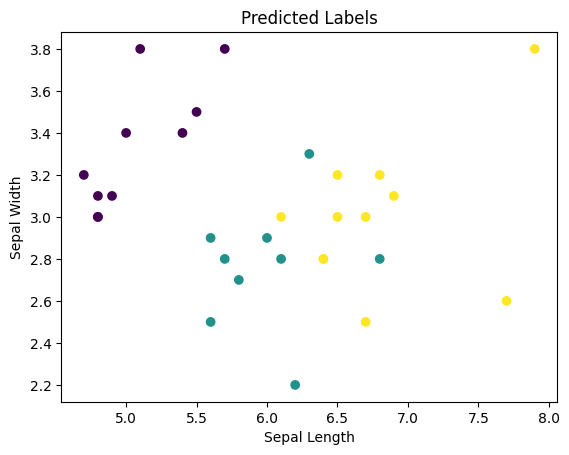

In [44]:

import matplotlib.pyplot as plt
# Plot the data points
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=Y_pred, cmap='viridis')
# Add labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Predicted Labels')
# Show the plot
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

filename='/kaggle/input/mushroom-dataset/mushroom_cleaned.csv'
df=pd.read_csv(filename)
df.head()
df=df[:5000]
x=df[['stem-height','stem-width']].values
y=df['class'].values

scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)

X_train,X_test,Y_train,Y_test=train_test_split(x_scaled,y,test_size=0.20)
X_train

/kaggle/input/mushroom-dataset/mushroom_cleaned.csv


array([[-0.76807461, -0.26620747],
       [ 0.81418116,  0.34459457],
       [ 1.01196313, -0.47982995],
       ...,
       [-1.28404295, -0.20132953],
       [ 1.20075501, -0.24563642],
       [ 1.08837889,  0.34617696]])

In [67]:
df['class'].unique()
df[df['class']==0].describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.0
mean,788.554611,4.572238,1.890463,8.417060,0.957262,1422.572238,9.456405,1.092399,0.0
std,441.963741,1.845042,1.851703,2.766546,0.857697,694.711568,2.936578,0.350372,0.0
min,69.000000,1.000000,0.000000,0.000000,0.000426,148.000000,0.000000,0.888450,0.0
25%,489.000000,2.000000,0.000000,7.000000,0.215291,1095.000000,10.000000,0.888450,0.0
50%,748.000000,6.000000,2.000000,10.000000,0.652980,1585.000000,11.000000,0.943195,0.0
75%,1105.000000,6.000000,2.000000,10.000000,1.583212,1924.000000,11.000000,0.943195,0.0
max,1866.000000,6.000000,5.000000,10.000000,3.536896,2942.000000,12.000000,1.804273,0.0


In [68]:
## logistic regression using numpy and gradient descent

def sigmoid(z):
    z = np.clip(z, -50000, 50000)
    return 1/(1+ np.exp(-z))

In [69]:
def compute_cost(x1,x2,y,w1,w2,b):
    m=x1.shape[0]
    cost=0
    epsilon = 1e-10
    for i in range(m):
        y_pred=w1*x1[i]+ w2*x2[i] +b
        temp=sigmoid(y_pred)
        cost+= -y[i] * np.log(temp + epsilon) - (1 - y[i]) * np.log(1 - temp + epsilon)
    
    cost=cost/m
    return cost

In [70]:
# compute_cost(X_train,Y_train,0,0)

compute_cost(X_train[:,0],X_train[:,1],Y_train,0,0,1)


0.9485116872320621

In [71]:
def compute_gradient(x1,x2,y,w1,w2,b):
    
    m=x1.shape[0]
    df_dw1=0
    df_dw2=0
    df_db=0
    
    for i in range(m):
        temp = w1 * x1[i] + w2 * x2[i] + b
        sig_temp = sigmoid(temp)
        df_dw1 += (sig_temp - y[i]) * x1[i]
        df_dw2 += (sig_temp - y[i]) * x2[i]
        df_db += (sig_temp - y[i])

    df_dw1=df_dw1/m
    df_dw2=df_dw2/m
    df_db=df_db/m
    return df_dw1,df_dw2,df_db


        

In [72]:
import math
def gradient_descent(max_iter,learning_rate,x1,x2,y,w1,w2,b):
    
    J_history=[]
    P_history=[]
    m=x1.shape[0]
    df_dw1=0
    df_dw2=0
    df_db=0
    for i in range(max_iter):
        cost=compute_cost(x1,x2,y,w1,w2,b)
        if i<=1000:
            J_history.append(cost)
            P_history.append([w1,w2,b])
        df_dw1,df_dw2,df_db=compute_gradient(x1,x2,y,w1,w2,b)
        w1=w1-(learning_rate*df_dw1)
        w2=w2-(learning_rate*df_dw2)
        b=b-(learning_rate*df_db)
#         if i % 1000 == 0:  # Adjust learning rate every 1000 iterations
#             learning_rate *= 0.9  # Decay learning rate
#         if i% math.ceil(max_iter/10) == 0:
#                 print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
#                       f"dj_dw1: {df_dw1: 0.3e},dj_dw1: {df_dw1: 0.3e}, dj_db: {df_db: 0.3e}  ",
#                       f"w1: {w1: 0.3e},w2: {w2: 0.3e}, b:{b: 0.5e}")
        
    
    return w1,w2,b,J_history[-1]

In [73]:
w1_final,w2_final,b_final,cost=gradient_descent(5000,0.01,X_train[:,0],X_train[:,1],Y_train,0,0,0)

In [76]:
## predict 

print(w1_final)
print(w2_final)
print(b_final)
print(cost)

m=X_test.shape[0]
X_test
p = np.zeros(m)
for i in range(m):
        temp_1= w1_final*X_test[:,0][i]+w2_final*X_test[:,1][i]+ b_final
        temp=sigmoid(temp_1)
        if temp>=0.5:
            p[i]=1


0.8828222436491425
-0.7460852383330184
-0.6996063902228925
0.5719884669266863


In [85]:
Y_test[:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [84]:
p[:10]

array([0., 0., 1., 1., 0., 0., 0., 0., 1., 0.])

In [62]:
X_test[:,0][i]

0.4133891566962597

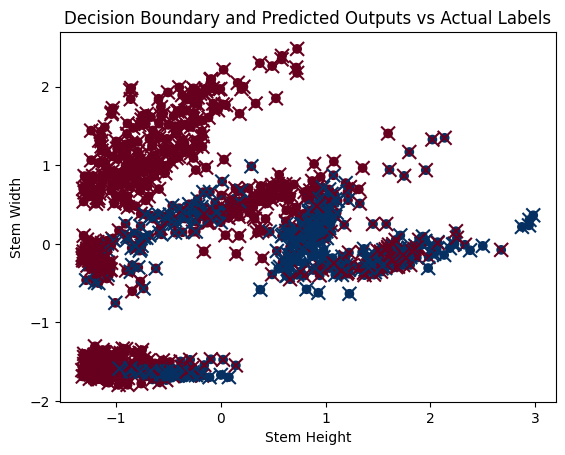

In [92]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Define a meshgrid of feature values for plotting the decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the points with colors based on predicted outputs
plt.scatter(X_test[:, 0], X_test[:, 1], c=p, cmap=plt.cm.RdBu, marker='o', label='Predicted')

# Plot the points with colors based on actual labels
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.RdBu, marker='x',s=100, label='Actual')

# Plot the decision boundary


plt.xlabel('Stem Height')
plt.ylabel('Stem Width')
plt.title('Decision Boundary and Predicted Outputs vs Actual Labels')
plt.show()

In [94]:
error_rate = np.mean(p != Y_test)
print("Error rate:", error_rate)

Error rate: 0.296
